#Actividad 4 Módulo 6

#Preguntas guía

- Reducción de dimensionalidad

- Regresion lineal

#Ejercicios planteados

La base de datos House_price.csv contiene información de casas. La idea es obtener un modelo que permita predecir el valor de venta de una casa.

Las variables son las siguientes:

● LotFrontage: Pies lineales de calle conectados a la propiedad

● LotArea: Tamaño del lote en pies cuadrados

● MasVnrArea: Área de revestimiento de mampostería en pies cuadrados

● BsmtFinSF1: Pies cuadrados del sótano terminados tipo 1

● BsmtFinSF2: Pies cuadrados con del sótano acabados tipo 2

● BsmtUnfSF: Pies cuadrados sin terminar de área del sótano

● TotalBsmtSF: Total de pies cuadrados de área del sótano

● 1stFlrSF: Pies cuadrados del primer piso

● 2ndFlrSF: Pies cuadrados del segundo piso

● LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los
pisos)
● GrLivArea: Pies cuadrados de área habitable sobre el nivel (suelo)

● GarageArea: Tamaño del garaje en pies cuadrados

● WoodDeckSF: Área de la plataforma de madera en pies cuadrados

● OpenPorchSF: Área del porche abierto en pies cuadrados

● EnclosedPorch: Área del porche cerrado en pies cuadrados

● 3SsnPorch: área de porche de tres estaciones en pies cuadrados

● ScreenPorch: Área del porche de la pantalla en pies cuadrados

● PoolArea: Área de la piscina en pies cuadrados

● MiscVal: Valor de la función miscelánea

● SalePrice: el precio de venta de la propiedad en dólares. Esta es la variable objetivo que se quiere modelar.

a) Cargue la base de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
!pip install umap-learn
import umap
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=b6703fb1667c6c76291af1c4b2b624039a563ac630ccb15e8125736cc889135b
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=2fcabef8b0030752c6a45d4013a534e9d9b299d609d64487b397d28de129b99a
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [16]:
# función para reducir número de variables explicativas para entrenar modelo
def pca(X):
  """
  input: X (variables explicativas)
  out: X (variables PCA)
  """
  # Keep components explaining 80% of variance
  pca = PCA(n_components=0.80)
  pca.fit(X)
  X_pca = pca.transform(X)
  # Take the principal components that explain 80% of the variance
  n_components = X_pca.shape[1]
  print(f'Number of components: {n_components}')
  return pca, X_pca

# función para definir datos de entrenamiento y prueba
def split_dataset(X, y, train_size=0.8):
  """
    input: X, y, train_size
    output: X_train, X_test, y_train, y_test
  """
  # División de los datos en train y test
  X_train, X_test, y_train, y_test = train_test_split(
                                          X,
                                          y,
                                          train_size   = train_size,
                                          random_state = 42,
                                          shuffle      = True
                                      )
  return X_train, X_test, y_train, y_test

def crear_entrenar_pred_modelo(X, y, train_size):
  """
    rutina de prueba
    input: X, y, train_size
    output: scores, mean_score, model_coef, model_intercept, scatter_plot_residual
  """
  # Creación del modelo
  modelo = LinearRegression(fit_intercept=True)
  # Perform cross-validation
  scores = cross_val_score(
      modelo, X, y, cv=5
  )
  display("Cross-Validation Scores:", scores)

  mean_score = scores.mean()
  display("Average Score:", mean_score)

  # Create a linear regression model
  modelo = LinearRegression()
  
  # spli datos para trbajar con el modelo
  X_train, X_test, y_train, y_test = split_dataset(X, y, train_size=train_size)

  # Fit the model on the training set
  modelo.fit(X_train, y_train)

  # Evaluate the model on the testing set
  score = modelo.score(X_test, y_test)

  print("Model Score:", score)

  coefficients = modelo.coef_
  intercept = modelo.intercept_
  display("Coefficients:", coefficients)
  display("Intercept:", intercept)

  # inspect model residuals
  y_pred = modelo.predict(X_test)
  residuals = y_test - y_pred
  print(residuals.shape, y_test.shape, y_pred.shape)
  sns.scatterplot(x=y_test, y=residuals)

In [3]:
house_price_df = pd.read_csv('./house_price.csv', sep=';')
house_price_df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,...,1647,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,...,2073,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,...,2340,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,...,1078,240,366,0,112,0,0,0,0,142125


¿hay alguna columna que no sea útil para el análisis?. Revise si existen casos faltantes en la base de datos, según la descripción de las variables, ¿qué pudiera significar un NA? Tome decisiones de qué hacer si existen casos faltantes. Si desea imputar los valores nulos de alguna variable por un valor puede utilizar data["columna"].fillna('valor', inplace = True).

In [4]:
house_price_df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [5]:
# buscamos existencia de datos NaN
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [6]:
# Las variables "LotFrontage" y MasVnrArea" presentan valores NaN
print(f"registros en variable LotFrontage que contiene valores NaN: {len(house_price_df[house_price_df.LotFrontage.isna()])}")
print(f"registros en variable MasVrnArea  que contiene valores NaN: {len(house_price_df[house_price_df.MasVnrArea.isna()])}")

registros en variable LotFrontage que contiene valores NaN: 259
registros en variable MasVrnArea  que contiene valores NaN: 8


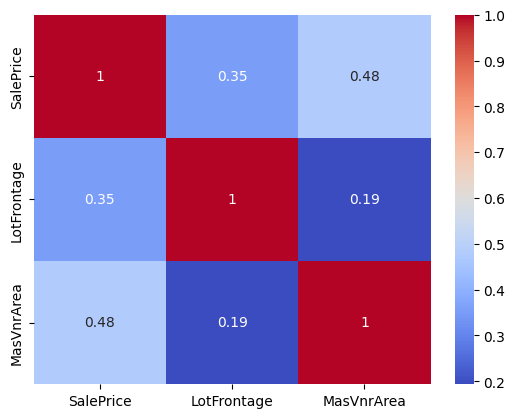

In [7]:
# Calcular la matriz de correlación
a = pd.DataFrame()
a['SalePrice'] = house_price_df.SalePrice
a['LotFrontage'] = house_price_df.LotFrontage
a['MasVnrArea'] = house_price_df.MasVnrArea
correlation_matrix = a.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

In [8]:
# revisada la información, dado que las variable son una característica importante para evaluar el precio de las casas,
# se opta por reemplazar los valores faltante por el promedio de cada variable
media = np.nanmean(house_price_df.LotFrontage)
house_price_df.LotFrontage.fillna(np.nanmean(house_price_df.LotFrontage), inplace=True)
# alternativa
house_price_df[house_price_df.MasVnrArea.isna()] = house_price_df.MasVnrArea.mean()

In [9]:
# revisión de los cambios
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   float64
 5   BsmtFinSF2     1460 non-null   float64
 6   BsmtUnfSF      1460 non-null   float64
 7   TotalBsmtSF    1460 non-null   float64
 8   1stFlrSF       1460 non-null   float64
 9   2ndFlrSF       1460 non-null   float64
 10  LowQualFinSF   1460 non-null   float64
 11  GrLivArea      1460 non-null   float64
 12  GarageArea     1460 non-null   float64
 13  WoodDeckSF     1460 non-null   float64
 14  OpenPorchSF    1460 non-null   float64
 15  EnclosedPorch  1460 non-null   float64
 16  3SsnPorch      1460 non-null   float64
 17  ScreenPorch    1460 non-null   float64
 18  PoolArea

b) La variable a modelar corresponde al precio de venta de la casa en dólares. En base a los modelos que hemos aprendido en clases, ¿qué modelo(s) podría(n) ser de utilidad para predecir el precio de venta de casas mediante las variables predictoras?

In [10]:
# Un modelo de aprendizaje supervisado como de regresion lineal puede ser empleado para predecir el precio de las viviendas ya que 
# contamos con la verdad o variable target numérica con el precio de venta.

c) Vamos a implementar un modelo de regresión lineal para modelar el
precio de venta de casas. Considerando que en la base de datos tenemos varias variables que dependen de otras, ¿cuál pudiera ser el
problema que surgiría en este contexto? ¿por qué esto es un problema? Discuta.

In [11]:
# Al existir variables con dependencia entre ellas, es decir entre las variables explicativas, puede ser un problema por:
# 
# - Afecta por decirlo de alguna forma, la sensibilidad de las estimaciones en el sentido de que, un cambios en los datos de entrada 
# o variables explicativas, pueden dar lugar a cambios drásticos en los coeficientes estimados, lo que dificulta la interpretación 
# precisa de la relación entre las variables independientes y la variable dependiente.

# - Se dificulta la identificación de las variables importantes porque están altamente correlacionadas, se vuelve difícil identificar 
# qué variables tienen un efecto importante en la variable target, esto puede ocultar la verdadera importancia de las variables y 
# dificultar hallar los predictores relevantes que entrega el modelo.

# Pero en general ocasiona problemas a la hora de intentar interpretar los coeficientes de regresión dificultando la interpretación 
# correcta de los efectos de las variables explicativas sobre la variable de verdad.

d) Realice un análisis de la correlación entre las variables. Comente.

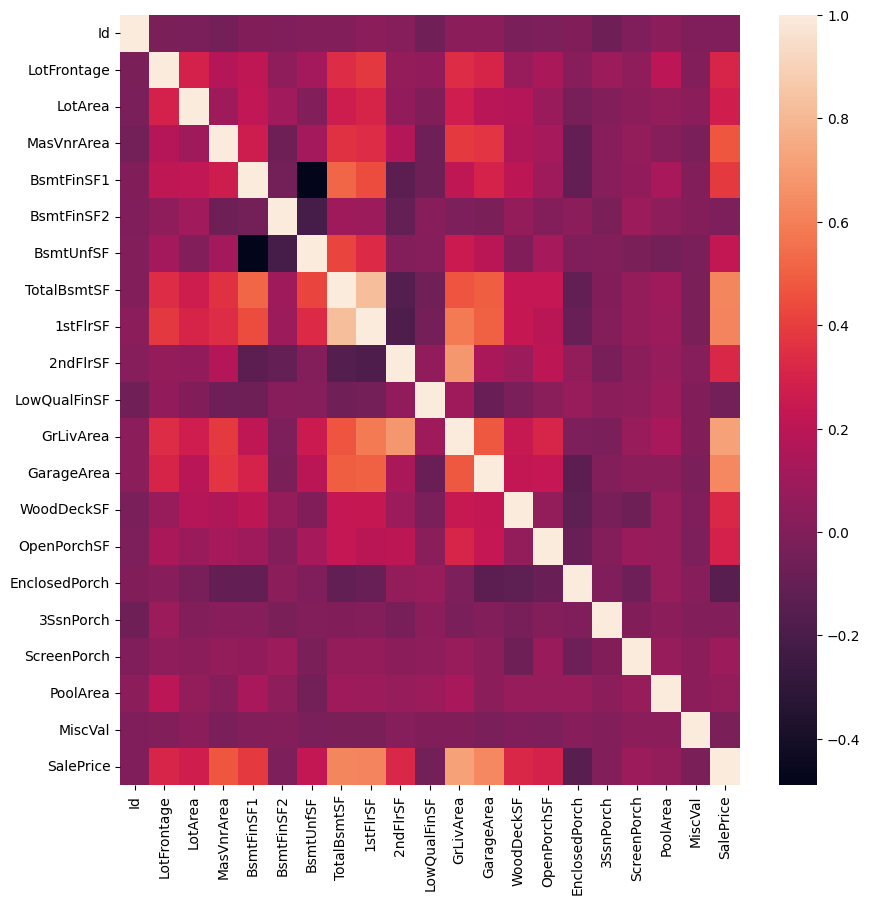

In [12]:
corr = house_price_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [26]:
house_price_df.corr()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.023181,-0.024153,-0.049997,-0.001188,-0.008324,0.000253,-0.000224,0.030230,0.011788,...,0.029434,0.029003,-0.028575,-0.013128,-0.006266,-0.071599,-0.010978,0.036051,-0.007052,-0.006682
LotFrontage,-0.023181,1.000000,0.295420,0.178562,0.209169,0.046299,0.110115,0.337984,0.381594,0.068289,...,0.337068,0.304458,0.076164,0.141244,0.021079,0.087796,0.050574,0.197665,0.002231,0.307920
LotArea,-0.024153,0.295420,1.000000,0.103851,0.216335,0.109316,0.001748,0.266588,0.304448,0.055905,...,0.270378,0.188522,0.172231,0.080940,-0.030495,0.001062,0.034130,0.062334,0.037425,0.273001
MasVnrArea,-0.049997,0.178562,0.103851,1.000000,0.264337,-0.072294,0.114099,0.359313,0.337588,0.174413,...,0.383362,0.370068,0.159716,0.125444,-0.109667,0.018223,0.061047,0.011526,-0.029814,0.470849
BsmtFinSF1,-0.001188,0.209169,0.216335,0.264337,1.000000,-0.050626,-0.489652,0.521872,0.444630,-0.133129,...,0.212476,0.299625,0.204737,0.103791,-0.110351,0.012685,0.056374,0.128764,0.003413,0.387194
BsmtFinSF2,-0.008324,0.046299,0.109316,-0.072294,-0.050626,1.000000,-0.211020,0.100786,0.091619,-0.100516,...,-0.013810,-0.020719,0.067792,0.005953,0.039125,-0.022883,0.090880,0.045646,0.005032,-0.014497
BsmtUnfSF,0.000253,0.110115,0.001748,0.114099,-0.489652,-0.211020,1.000000,0.421756,0.326318,0.009316,...,0.250572,0.191709,-0.004603,0.124599,-0.011285,0.001213,-0.021398,-0.048565,-0.024475,0.224964
TotalBsmtSF,-0.000224,0.337984,0.266588,0.359313,0.521872,0.100786,0.421756,1.000000,0.823311,-0.162726,...,0.470448,0.496310,0.230334,0.231120,-0.113832,-0.002567,0.065655,0.094134,-0.019423,0.623177
1stFlrSF,0.030230,0.381594,0.304448,0.337588,0.444630,0.091619,0.326318,0.823311,1.000000,-0.186810,...,0.582692,0.502380,0.232815,0.193197,-0.090461,0.005258,0.064704,0.091478,-0.022289,0.619533
2ndFlrSF,0.011788,0.068289,0.055905,0.174413,-0.133129,-0.100516,0.009316,-0.162726,-0.186810,1.000000,...,0.684406,0.143838,0.090658,0.207257,0.059782,-0.033757,0.035655,0.072789,0.015875,0.324805


¿existen variables muy correlacionadas entre sí?

In [ ]:
# Aunque se observa que existen bastante interrelación entre las variables explicativas, tanto positivas y negativas, estas correlaciones
# no lo son fuerte o muy correlacionadas entre si.
# Opcionalmente, se pueden tomar algunas medidas para evitar esto, como por ejemplo eliminar variables redundantes, realizar algunas
# transformaciones de variables, esto puede ayuda a reducir lo efectos no deseados y mejorar la interpretación del modelo de regresión 
# lineal.

¿Por qué cree que ocurre?

In [ ]:
# Algunas variables antiene una dependencia entre ellas porque, en este caso, algunas valores corresponden a medidas de las
# viviendas, las que van definiendo sus características y tratandose de medidas, algunas de estas pueden depender de otras para
# determinar su valor, es el caso de la medida de la superficie de la vivienda, esta esta relacionada con las medidas o distancias
# de el frente y el fondo del terreno, medidas que determina las colindantes del terreno. 
# otro ejemplo, son las medidas del sótano, que se prenta en varias configuraciones.
# En resumen, muchas variables estan descriven sus medidas en distancias, por lo que al aumentar estas unidades, lo hacen todas 
# las que dependen de esta unidad, es decir, si aumenta la superficie, aumentan todas que dependen de las superficies y viceversa.


e) Suponga que este es un problema de gran volumen, donde tenemos
muchas columnas y registros. Cuando existen variables muy
correlacionadas el costo computacional para obtener el modelo puede
ser muy elevado. Obtenga el tiempo de procesamiento para obtener
una regresión lineal. Para esto, podemos obtener la regresión lineal
utilizando la función LinearRegression de sklearn.linear_model y
calcular el tiempo de procesamiento de la siguiente forma:

`from datetime import datetime`

`start=datetime.now()`

[aquí va el código del modelo]

`print(datetime.now()-start)` #esto entrega el tiempo que demoró
en correr el modelo.

In [13]:
# definición de variables predictoras
X = house_price_df.drop('SalePrice', axis=1).values
# definición de variable objetivo
y = house_price_df.SalePrice.values

# X_train, X_test, y_train, y_test = split_dataset(X,y, 0.8)

'Cross-Validation Scores:'

array([0.75603412, 0.69874944, 0.75977168, 0.68804342, 0.44732613])

'Average Score:'

0.6699849594791816

Model Score: 0.7694922365002874


'Coefficients:'

array([ -4.44484862, -92.60735149,   0.20546782,  39.45078454,
       -45.58332364, -65.70365719, -55.6422756 ,  94.60531317,
       -39.58043971, -30.60693798, -96.86200126,  94.48519065,
        90.48003892,  51.41449803,  36.7436932 , -61.71422139,
        61.84543185,  53.95447821, -61.53642123,  -0.74990037])

'Intercept:'

3405.696091551392

(292,) (292,) (292,)

Tiempo que demoró en correr el modelo: 0:00:00.184587


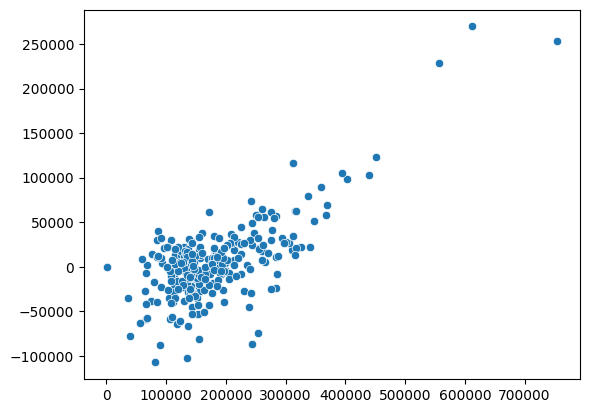

In [18]:
start=datetime.now()
##########################################################################

# crear datos de entrenamiento y prueba, luego crear modelo t predecir
crear_entrenar_pred_modelo(X,y, train_size=0.8)

##########################################################################
print(f"\nTiempo que demoró en correr el modelo: {datetime.now()-start}")

f) Obtenga las componentes principales utilizando las variables
estandarizadas, si desea explicar un 80% de la variabilidad.

In [19]:
# determinar mínimo de variables mediante compresor PCA
pca, X_pca = pca(X)

Number of components: 1


In [20]:
# Generar set de variables para emplear en el modelo
X_reconstructed = pca.inverse_transform(X_pca)

'Cross-Validation Scores:'

array([ 0.08484942, -0.11244776,  0.09499486,  0.05569006,  0.0746489 ])

'Average Score:'

0.039547096782677316

Model Score: 0.0694250385468439


'Coefficients:'

array([-8.41538246e+11, -5.15565092e+10,  5.03265897e+10, -4.10565523e+10,
        4.62323615e+11,  1.55639915e+10, -1.22358227e+12, -7.61548860e+12,
       -2.33894221e+10, -5.52832615e+11, -9.23928533e+09,  2.72041586e+12,
       -7.94760889e+11, -3.18990406e+10, -1.55439906e+10,  3.75534021e+10,
       -2.40451545e+09, -6.05870806e+10,  3.70960363e+09,  1.41496216e+11])

'Intercept:'

5072560795400318.0

(292,) (292,) (292,)

Tiempo que demoró en correr el modelo: 0:00:00.161591


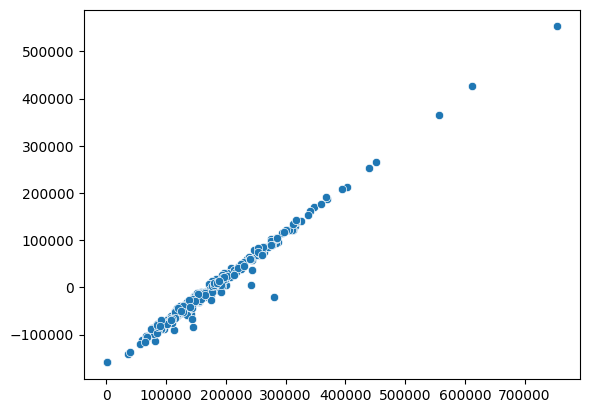

In [22]:
start=datetime.now()
##########################################################################

# crear datos de entrenamiento y prueba, luego crear modelo t predecir
# empleando las variable mínimas generadas por el compresor PCA
crear_entrenar_pred_modelo(X_reconstructed, y, train_size=0.8)

##########################################################################
print(f"\nTiempo que demoró en correr el modelo: {datetime.now()-start}")

¿cuántas componentes debería elegir? Argumente.

In [ ]:
# Para minimizar el espacio de almacenamiento y tiempo de procesamiento con menos variables
# la representación empleando con compresor PCA, si bien redujo considerablemente el número de variables a 1 de las 20 variables, 
# el resultado mantiene la tendencia y redujo el número de elementos lo que mejora notoriamente el rendimiento del modelo.

g) Corra el modelo de regresión lineal con las componentes principales como variables predictoras. Vuelva a calcular el tiempo de procesamiento.

In [23]:
reducer = umap.UMAP()
reducer.fit(X)
X_umap = reducer.transform(X)
X_umap.shape

(1460, 2)

In [24]:
X_reconstructed = reducer.inverse_transform(X_umap)

'Cross-Validation Scores:'

array([0.52365277, 0.53725512, 0.48126203, 0.49806312, 0.53071112])

'Average Score:'

0.5141888336060546

Model Score: 0.5332691707707915


'Coefficients:'

array([  -5.413624 ,  105.12101  ,   -1.2110176,   43.469044 ,
       -100.52632  , -207.77971  , -127.97697  ,  160.0188   ,
        -49.704155 ,  -82.769165 , -195.43341  ,  160.33931  ,
         51.688015 ,   91.58609  ,  144.15823  ,  -46.338196 ,
        -48.558342 , -103.7955   ,  471.4744   ,    8.623023 ],
      dtype=float32)

'Intercept:'

-49473.17

(292,) (292,) (292,)

Tiempo que demoró en correr el modelo: 0:00:00.183888


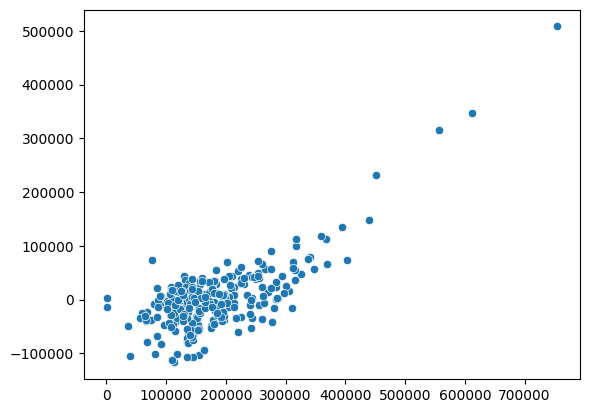

In [25]:
start=datetime.now()
##########################################################################

# crear datos de entrenamiento y prueba, luego crear modelo t predecir
crear_entrenar_pred_modelo(X_reconstructed,y, train_size=0.8)

##########################################################################
print(f"\nTiempo que demoró en correr el modelo: {datetime.now()-start}")

In [ ]:
# la representación empleando con compresor UMAP es la màs cercada a la representación original, siendo que emplea 2 de las 20 
# variables, el resultado es muy satisfactorio.

¿En cuál caso suele demorarse menos?

In [ ]:
# el que suele demorar menos es el que contiene una dimensionalidad menor.

¿Qué ganamos al realizar componentes principales? Concluya.

In [ ]:
# Lo que ganamos se puede resumir en estos puntos:
# 1. reduccion de dimensiones, 
# 2. identificacion de patrones y tendencia, 
# 3. eliminacion de variables altamente correlacionadas
# 4. poder visualizacion de datos de alta dimensionalidad en menor dimensionalidad
# 5. por último, la compresion de grandes volumenes de datos, posbilita optimizar su almacenamiento y su transmisión como
#    por ejemplo una API utilizadas en la web.